Библиотеки Python для DS (I) -> Библиотеки Python для DS (II) -> **Алгоритмы анализа данных**

Правила:
- улучшаем/усложняем алгоритмы сами, используя numpy и pandas для генерации или чтения данных 
- алгоритмы из библиотеки sklearn использовать только для проверки решений, но не для самих решений!
- ДЗ сдавать в jupyter блокнотах
- pull request / ссылка / файл
- не копировать разбор ДЗ в своем ДЗ
- курсовик есть, даже два, но они по желанию

# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

<h1>План занятия<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1">Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Уравнение-прямой" data-toc-modified-id="Уравнение-прямой-1.1">Уравнение прямой</a></span></li><li><span><a href="#Уравнение-линейной-регрессии" data-toc-modified-id="Уравнение-линейной-регрессии-1.2">Уравнение линейной регрессии</a></span></li></ul></li><li><span><a href="#Метод-наименьших-квадратов-(Ordinary-Least-Squares)" data-toc-modified-id="Метод-наименьших-квадратов-(Ordinary-Least-Squares)-2">Метод наименьших квадратов (Ordinary Least Squares)</a></span></li><li><span><a href="#Градиентный-спуск-(gradient-descent)" data-toc-modified-id="Градиентный-спуск-(gradient-descent)-3">Градиентный спуск (gradient descent)</a></span></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Линейная регрессия

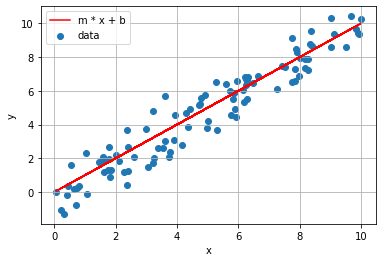

In [2]:
x = np.random.uniform(low=0, high=10, size=100)
m, b = 1, 0
data = m * x + b + np.random.randn(100)
plt.scatter(x, data, label='data')
plt.plot(x, m * x + b, 'r', label='m * x + b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

#### Уравнение прямой

<div style='float:left;'><img src='img/slope-intercept-form.png' width=250 align='left'></img></div><div style='float:left;'><img src='img\slope-intercept.png' width=300 align='center'></img></div>

In [3]:
from ipywidgets import interactive

def f(m, b):
    plt.figure(2)
    x = np.linspace(0, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(0, 10)
    plt.xlim(0, 10)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-10, 10, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), IntSlider(value=0, descripti…

#### Уравнение линейной регрессии

$${y}_i = w_0 + w_1\cdot x_{i}+\epsilon_i, \text{ for } i \in [1,n]$$
$$\hat{y}_i = \hat w_0\cdot 1 + \hat w_1\cdot x_{i}, \text{ for } i \in [1,n]$$

$$\vec{y}=X\vec{w},$$


$$\text{где }\vec{y} = \begin{pmatrix}
\hat y_{1}\\ 
\vdots\\ 
\hat y_{n}
\end{pmatrix}, 
X = \begin{pmatrix}
1 & x_{1}\\ 
\vdots & \vdots\\ 
1 & x_{n}
\end{pmatrix},
\vec{w} = \begin{pmatrix}
\hat w_{0}\\ 
\hat w_{1}
\end{pmatrix}
$$

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],     # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
X.shape

(10, 2)

In [5]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [6]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

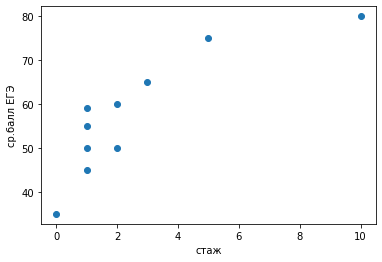

In [7]:
plt.scatter(X[:,1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

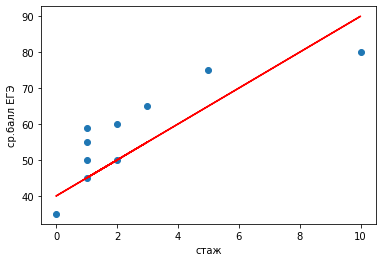

In [8]:
# y = m * x + b
m = 5
b = 40
plt.scatter(X[:,1], y);
plt.plot(X[:,1],  m * X[:,1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [9]:
y_pred1 = 40 + 5 * X[:,1] 
y_pred2 = 40 + 5 * X[:,1]

In [10]:
y_pred1

array([45, 45, 50, 45, 55, 40, 65, 90, 45, 50])

In [11]:
y_pred2

array([45, 45, 50, 45, 55, 40, 65, 90, 45, 50])

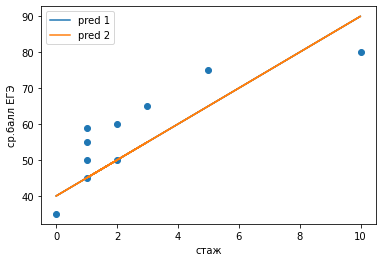

In [12]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_pred1, label='pred 1')
plt.plot(X[:,1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [13]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(4.4, 4.4)

In [14]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(7.4, 7.4)

In [15]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(74.6, 74.6)

In [16]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
rmse_1, rmse_2

(8.637129152675673, 8.637129152675673)

### Метод наименьших квадратов (Ordinary Least Squares)

Нормальное уравнение линейной регрессии
$$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$$

In [17]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [18]:
X.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [19]:
X.T @ X

array([[ 10,  26],
       [ 26, 146]])

In [20]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([47.23214286,  3.91071429])

In [21]:
w_ = [40, 5]
print(X @ w_)
print(np.dot(w_, X.T))
print(np.dot(X, w_))
print(w_[0] * X[:,0] + w_[1] * X[:,1])
print(np.sum(w_ * X, axis=1))

[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]


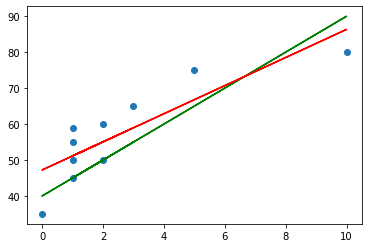

In [22]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 40 + X[:,1] * 5, color='g')
plt.plot(X[:,1], w[0] + w[1] * X[:,1], color='red');

In [23]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [24]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(7.4, 74.6)

In [25]:
y_pred3 = w[0] * X[:,0] + w[1] * X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [26]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142856, 45.93749999999999)

### Градиентный спуск (gradient descent)

<img src='img/grad_desent.gif' width=500 align='center'></img>

$$L(w)=\frac{1}{n}\sum^{n}_{i=1}\big(\sum^{m}_{j=0}(w_jx_{ij})-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}}$$
$$w_j\rightarrow w_j-\eta\frac{\partial}{\partial w_j}L(w)$$
$$\frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big)$$
$$\vec{w}=\vec{w}-\eta \frac{2}{n}X^T(X\vec{w}-\vec{y}) $$


In [27]:
n = 10
eta = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X.T * (np.sum(w * X, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X.T, (np.dot(X, w) - y))
w, w - eta * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?  

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864


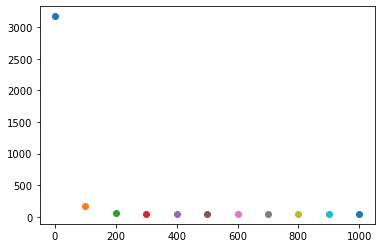

In [64]:

n = X.shape[0]
eta = 1e-2 # Увеличив значение параметра в 10 раз при сохранении кол-ва итераций быстро приходим к нужному результату
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
        plt.scatter(i,err)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [82]:

w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    #w -= eta * (1/n * 2 * np.sum(X.T * (y_pred - y))) # ошибка!
    w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse за одну итерацию в размере diff=1e-6, а значение eta=1e-2?

In [87]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2

error=[]
for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    error.append(err)
    if len(error)>=2 and abs(error[-1]-error[-2])<=diff:
        break
    w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538


Заметки по дифференцированию матриц 
http://nabatchikov.com/blog/view/matrix_der_2 и матричным вычислениям http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf
